In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import pandas as pd #For data related tasks
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
import math 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import time
from time import perf_counter
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from tempfile import mkdtemp
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 

In [2]:
X_train = pd.read_csv('data/X_train.csv', index_col=0) 
X_val = pd.read_csv('data/X_val.csv', index_col=0) 
X_test = pd.read_csv('data/X_test.csv', index_col=0) 
y_train = pd.read_csv('data/y_train.csv', index_col=0) 
y_val = pd.read_csv('data/y_val.csv', index_col=0)
y_test = pd.read_csv('data/y_test.csv', index_col=0)

In [3]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

In [4]:
X_train.drop(['description'], axis = 1, inplace = True)
X_val.drop(['description'], axis = 1, inplace = True)
X_test.drop(['description'], axis = 1, inplace = True)

In [5]:
index = X_train.columns
model_score = pd.DataFrame(columns=('r2', 'mae','rmse', 'mse', 'run_time' ))

In [6]:
#analyzing shape to find if there any discrepancy before starting to model
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}') 
print(f'y_test Shape: {y_test.shape}') 
print(f'X_val Shape: {X_val.shape}') 
print(f'y_val Shape: {y_val.shape}')

X_train Shape: (204156, 350)
y_train Shape: (204156,)
X_test Shape: (63799, 350)
y_test Shape: (63799,)
X_val Shape: (51039, 350)
y_val Shape: (51039,)


In [7]:
# Instantiate model & fit the DT
t0 = perf_counter()
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)
t1 = perf_counter()
time_taken_dt = t1 - t0

In [8]:
dtr_predict = dtr_model.predict(X_val)

dtr_r2 = dtr_model.score(X_val,y_val)
dtr_mse = mean_squared_error(y_val, dtr_predict)
dtr_mae = mean_absolute_error(y_val, dtr_predict)
dtr_rmse = sqrt(mean_squared_error(y_val, dtr_predict))

#model_score = model_score.append(pd.DataFrame({'r2':[dtr_r2], 'mae':[dtr_mae],'rmse':[dtr_rmse], 'mse': [dtr_mse],
#                                               'run_time':[(time_taken_dt)/60]} ,index = ['Decision Tree Regression']))

# Evaluate
print(f"Decision Tree Regressor R2 score for train set: {dtr_model.score(X_train, y_train)}")
print(f"Decision Tree Regressor R2 score for val set:  {dtr_model.score(X_val,y_val)}")
print(f"Decision Tree Regressor MAE for val set: {dtr_mae}")
print(f"Decision Tree Regressor RMSE for val set: {dtr_rmse}" )
print(f"Decision Tree Regressor MSE for val set: {dtr_mse}")
print(f"Model runtime: {time_taken_dt/60}")

Decision Tree Regressor R2 score for train set: 0.9996522273204056
Decision Tree Regressor R2 score for val set:  0.8901142041703581
Decision Tree Regressor MAE for val set: 1791.8294667261632
Decision Tree Regressor RMSE for val set: 4212.110729919623
Decision Tree Regressor MSE for val set: 17741876.80110402
Model runtime: 0.2305328216666667


Scoring Matrices

Mean Absolute Error (MAE) is a measure of errors between paired observations. It is thus an arithmetic average of the absolute errors, which is th most important error rate for price prediction and we would give priorirty to this on R2 score
R-Squared value or The Coefficient of Determination
And for plain vanila Decision Tree model the error rate is 1791 and R2 on validation set is 0.89

Other matices for error rate for understanding purpose of readers

Mean Squared Error (MSE) - penalizing the model for larger magnitude errors (Another way to interpret MSE is, Variance of error values(How widely dispersed errors are)!)

Root Mean Squared Error - RMSE is standard deviation of errors

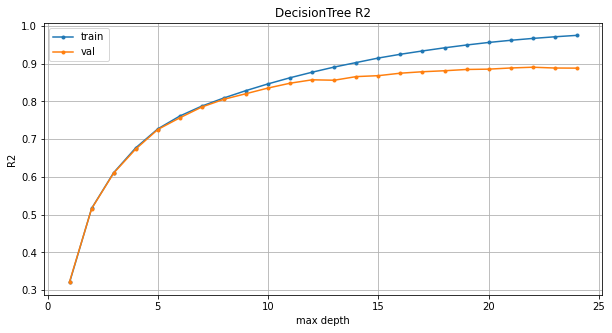

In [9]:
#Optimizing model to find max depth
# (number of samples required to populate the tree doubles for each additional level the tree grows to. 
#  trying to find optimal max_depth to control the size of the tree for preventing overfitting.)

#create some lists
train_accs = []
val_accs = []
depth_value = list(range(1,25))


# set up the loop
for i in depth_value:
    my_dt = DecisionTreeRegressor(max_depth=i)
    my_dt.fit(X_train,y_train)
    
    # append to lists
    train_accs.append(my_dt.score(X_train,y_train))
    val_accs.append(my_dt.score(X_val,y_val))
    

plt.figure(figsize=(10,5)) # plot classifier results
plt.plot(depth_value, train_accs, label='train', marker='.')
plt.plot(depth_value, val_accs , label='val', marker='.')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('R2')
plt.grid(True)
plt.title('DecisionTree R2')
plt.show()

In [10]:
#Fitting the model with optimal value of 20 as max_depth
#Fit to the training data
t0 = perf_counter()
dtr20_model = DecisionTreeRegressor(max_depth=20)
dtr20_model.fit(X_train, y_train)

dtr20_predict = dtr20_model.predict(X_val)


dtr20_r2 = dtr20_model.score(X_val,y_val)
dtr20_mse = mean_squared_error(y_val, dtr20_predict)
dtr20_mae = mean_absolute_error(y_val, dtr20_predict)
dtr20_rmse = sqrt(mean_squared_error(y_val, dtr20_predict))
t1 = perf_counter()
time_taken = t1 - t0
#model_score = model_score.append(pd.DataFrame({'r2':[dtr20_r2], 'mae':[dtr20_mae],'rmse':[dtr20_rmse], 'mse': [dtr20_mse],
#                                               'run_time':[(time_taken)/60]} ,index = ['Decision Tree Regressor max_depth of 20']))


# Evaluate
print(f"Decision Tree Regressor max_depth 20 R2 score for train set: {dtr20_model.score(X_train, y_train)}")
print(f"Decision Tree Regressor max_depth 20 R2 score for val set:  {dtr20_model.score(X_val,y_val)}")
print(f"Decision Tree Regressor max_depth 20 MAE for val set: {dtr20_mae}")
print(f"Decision Tree Regressor max_depth 20 RMSE for val set: {dtr20_rmse}" )
print(f"Decision Tree Regressor max_depth 20 MSE for val set: {dtr20_mse}")
print(f"Decision Tree Regressor max_depth 20 Model runtime: {time_taken/60}")

Decision Tree Regressor max_depth 20 R2 score for train set: 0.9560945914076457
Decision Tree Regressor max_depth 20 R2 score for val set:  0.8865744816487545
Decision Tree Regressor max_depth 20 MAE for val set: 2242.965565738786
Decision Tree Regressor max_depth 20 RMSE for val set: 4279.414826547483
Decision Tree Regressor max_depth 20 MSE for val set: 18313391.25767443
Decision Tree Regressor max_depth 20 Model runtime: 0.16634901666666668


The first parameter for decision tree model was to tune max_depth. This parameter indicates how deep we want our tree to be. As initially tree was deep, it means we were creating a large number of splits in the parameter space and capturing more information about underlying train data. Where we observed R2 score of 0.99 indicating overfitting in training data and out model was having  R2 score for val data which was higher difference. That resulted in low training error but a large val/testing error.

On the other hand, if the tree was too shallow, we may run into underfitting, i.e. we would not have our tree learn enough information about the data and the accuracy of model stays low for both val/test and training samples. Hence, We fit a decision tree with depths ranging from 1 to 25 and plot the training and test.


In above plt, we see that as the tree depth increases, our validation/test accuracy starts to stabilize after a depth of around 20. But with even greater depths, the training accuracy keeps on rising , as the model learns more information from the data , but this can not be mapped onto unseen data, hence the validation accuracy stays stable. Finding the sweet spot (max depth=20) in this case would be the first hyper parameter that we tuned. 

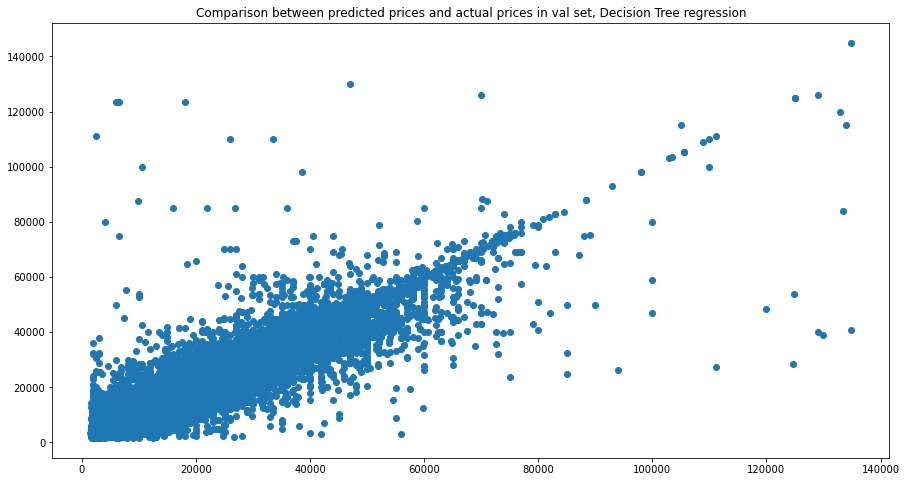

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Comparison between predicted prices and actual prices in val set, Decision Tree regression')
plt.scatter(y_val, dtr20_predict)

In [12]:
#setup directory to cache pipeline results
cachedir=mkdtemp()

In [13]:
#Decision Tree
#selected max depth of 10 and now cross validation throuigh Grid Search via pipeline 

my_dt_pipeline = Pipeline(steps=[('model', DecisionTreeRegressor())], memory=cachedir)

#parameter grid
dt_param_grid = [
    #Linear Regression
    {'model':[DecisionTreeRegressor(max_depth=20)],
     'model__min_samples_leaf': [2, 3, 4, 5],
     'model__min_samples_split':[2,5,10,25],
     'model__max_features':['auto', 'sqrt', 'log2'],
     'model__random_state': [1]
     }
]
dt_gs = GridSearchCV(estimator=my_dt_pipeline, param_grid=dt_param_grid, cv=5,n_jobs=-1, verbose=3)

In [14]:
t0 = perf_counter()
fitted_dt = dt_gs.fit(X_train, y_train)
t1 = perf_counter()
time_taken_dt = t1 - t0

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.4min finished


In [38]:
dt_predict = fitted_dt.predict(X_val)

dt_r2 = dt_gs.score(X_val,y_val)
dt_mse = mean_squared_error(y_val, dt_predict)
dt_mae = mean_absolute_error(y_val, dt_predict)
dt_rmse = sqrt(mean_squared_error(y_val, dt_predict))
#t1 = perf_counter()
#time_taken = t1 - t0
#model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'mae':[lr_mae],'rmse':[lr_rmse], 'mse': [lr_mse],
                                              # 'run_time':[(time_taken_lr)/60],'best_parameters':[fitted_lr.best_estimator_]} ,index = ['Linear Regression']))


# Evaluate
print(f"Decision Tree optmized R2 score for train set: {dt_gs.score(X_train, y_train)}")
print(f"Decision Tree optmized R2 score for val set:  {dt_gs.score(X_val,y_val)}")
print(f"Decision Tree optmized MAE for val set: {dt_mae}")
print(f"Decision Tree optmized RMSE for val set: {dt_rmse}" )
print(f"Decision Tree optmized MSE for val set: {dt_mse}")
print(f"Decision Tree optmized runtime: {time_taken_dt/60}")
print(f"Decision Tree optmized Parameters: {fitted_dt.best_estimator_}")

Decision Tree optmized R2 score for train set: 0.9362022747262446
Decision Tree optmized R2 score for val set:  0.8959287389137133
Decision Tree optmized MAE for val set: 2319.8870796957217
Decision Tree optmized RMSE for val set: 4099.155649422365
Decision Tree optmized MSE for val set: 16803077.03819129
Decision Tree optmized runtime: 6.553155911666667
Decision Tree optmized Parameters: Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmpv_qdzdn8',
         steps=[('model',
                 DecisionTreeRegressor(max_depth=20, max_features='auto',
                                       min_samples_leaf=4, min_samples_split=10,
                                       random_state=1))])


### Random Forest 

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". 


Random Forest Regression in Python


Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data and hence the output doesn’t depend on one decision tree but multiple decision trees. For our regression the final output would be average of all decisoin tree which is part of Aggregation

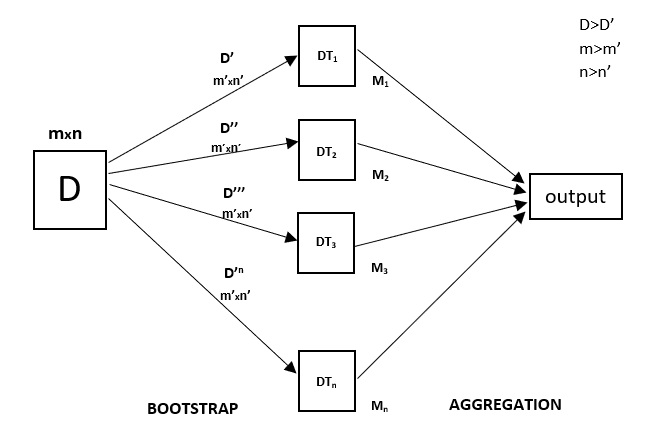


Each Decision tree will do is take the average of all true y of each leaf (the node that doesn't have anymore splits) as the estimated y-hat for that particular path, so that when you predict your val/test dataset, each record from that test dataset will basically follow some path down the tree until it hits a leaf node, and the estimated y-hat for that record will be the average true y of all observations in that leaf node.

A random forest is basically a collection of decision trees which use a subset of your training data to do the training. These trees are usually not as deep as a single decision tree model, which helps alleviate the overfitting symptoms of a single decision tree. The idea of a RF is that you're using many weak learners that can generalize your data well. Hence, less overfit.

The R-squared metric is basically 1 - (SS_res / SS_tot). Breaking that formula down, you're basically looking at the sum of squared residuals and the sum of squared total. Therefore, you just have to know the true y values, the estimated y-hat values, and the mean of the true y values, y-bar.

In [17]:
from sklearn.ensemble import RandomForestRegressor 

In [18]:
# create regressor object 
t0 = perf_counter()
rfr_model = RandomForestRegressor() 
  
# fit the regressor with x and y data 
rfr_model.fit(X_train, y_train)

rfr_predict = rfr_model.predict(X_val)

rfr_r2 = metrics.r2_score(y_val, rfr_predict)
rfr_rmse = math.sqrt(metrics.mean_squared_error(y_val, rfr_predict))

model_score = model_score.append(pd.DataFrame({'r2':[rfr_r2], 'rmse':[rfr_rmse]}, index = ['Random Forest Regressor']))


rfr_r2 = rfr_model.score(X_val,y_val)
rfr_mse = mean_squared_error(y_val, rfr_predict)
rfr_mae = mean_absolute_error(y_val, rfr_predict)
rfr_rmse = sqrt(mean_squared_error(y_val, rfr_predict))
t1 = perf_counter()
time_taken = t1 - t0
model_score = model_score.append(pd.DataFrame({'r2':[rfr_r2], 'mae':[rfr_mae],'rmse':[rfr_rmse], 'mse': [rfr_mse],
                                               'run_time':[(time_taken)/60]} ,index = ['Random Forest Regressor ']))



# Evaluate
print(f"Random Forest Regressor R2 score for train set: {rfr_model.score(X_train, y_train)}")
print(f"Random Forest Regressor R2 score for val set:  {rfr_model.score(X_val,y_val)}")
print(f"Random Forest Regressor MAE for val set: {rfr_mae}")
print(f"Random Forest Regressor RMSE for val set: {rfr_rmse}" )
print(f"Random Forest Regressor MSE for val set: {rfr_mse}")
print(f"Random Forest Regressor Model runtime: {time_taken/60}")

Random Forest Regressor R2 score for train set: 0.9908465724339516
Random Forest Regressor R2 score for val set:  0.9395761929728107
Random Forest Regressor MAE for val set: 1490.5240088458172
Random Forest Regressor RMSE for val set: 3123.439103090496
Random Forest Regressor MSE for val set: 9755871.830714762
Random Forest Regressor Model runtime: 11.968785893333331


In [19]:
model_score

,r2,mae,rmse,mse,run_time
Random Forest Regressor,0.939576,NaN,3123.439103,NaN,NaN
Random Forest Regressor,0.939576,1490.524009,3123.439103,9.755872e+06,11.968786


 can be observed that MAE and R2 scores immediately increase while implementing Random Forest model to 0.9461 and 1490 which is significant improvement

In [21]:
importance = rfr_model.feature_importances_

In [22]:
Coef_df = pd.DataFrame(importance, index=index.values, columns=['importance'])

In [23]:
Coef_df.head(5)

,importance
year,0.404016
cylinders,0.204793
odometer,0.099097
lat,0.016778
long,0.019486


In [24]:
Coef_df.sort_values(by='importance', ascending=False).head(20)

,importance
year,0.404016
cylinders,0.204793
odometer,0.099097
fuel_diesel,0.054782
drive_fwd,0.036346
long,0.019486
drive_4wd,0.016821
lat,0.016778
car_model_chevrolet corvette,0.012034
car_model_jeep wrangler,0.006336


In [25]:
imp = Coef_df.sort_values(by='importance', ascending=False).head(20)

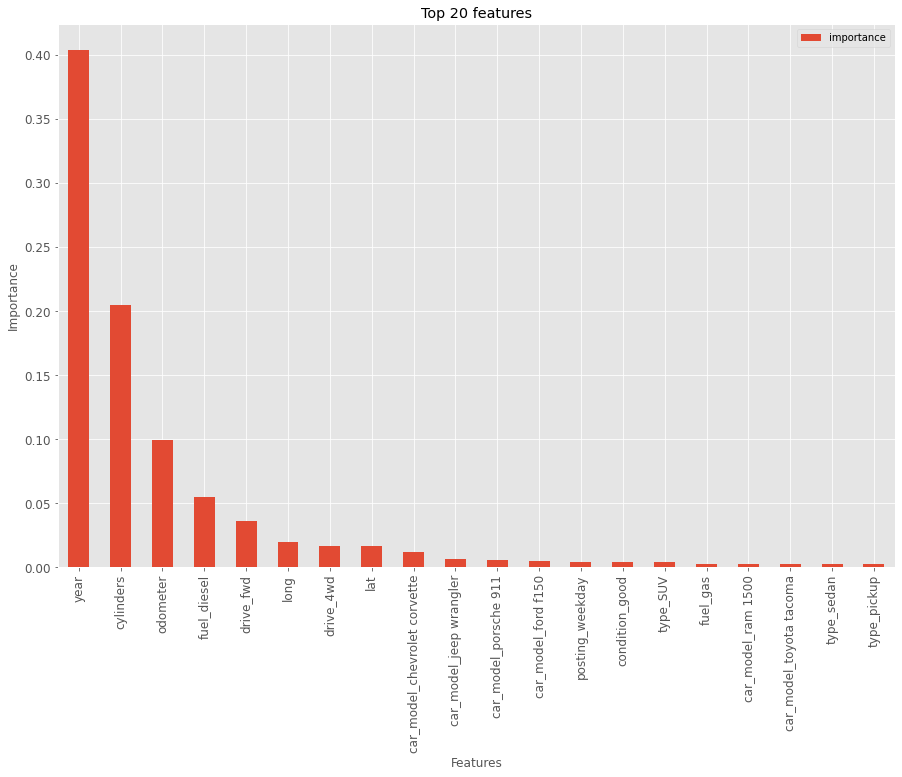

In [26]:
import pandas as pd
import matplotlib.pyplot as plt  


plt.style.use('ggplot')
ax = imp[['importance']].plot(kind='bar', title ="Top 20 features",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Features",fontsize=12)
ax.set_ylabel("Importance",fontsize=12)
plt.show()

Top 20 important features are plotted above and it is pertinent to note that year of vehicle model is the single most important feture followed by number of cylinders and odometer reading. 

### Hyperparameter tuning using grid search with k-fold cross-validation
we use a procedure called k-fold cross-validation where k is the number of folds (which is usually 5 or 10). 

In k-fold cross-validation,
 -  first divide the original dataset into the train set and test set using train_test_split() function.
 - The train set is further divided into k-number of folds.
 - The model is trained using k−1 of the folds and validated on the remaining fold.
 - The process is done k times and the performance measure is reported at each execution. Then it takes the average.
 - After finding the parameters, the final evaluation is done on the test set.
 - The following diagram illustrates the k-fold cross-validation procedure.
 

 
 Image from Scikit-learn official website: https://scikit-learn.org
 
 
 Tuning hyperparameters can be done using the Grid Search method along with k-fold cross-validation. The equivalent Scikit-learn function is GridSearchCV and Randomized Search. It finds all the hyperparameter combinations for a specified k number of folds. 
 

In [27]:
#GRID SEARCH

my_rf_pipeline = Pipeline(steps=[('model', RandomForestRegressor())], memory=cachedir)

#parameter grid
rf_param_grid = [
    #Linear Regression
    {'model':[RandomForestRegressor()],
     'model__max_depth': [15,20,25],
     'model__min_samples_split':[2,5,10,25],
     'model__max_features':['auto', 'sqrt', 'log2'],
     'model__random_state': [1]
     }
]
rf_gs = GridSearchCV(estimator=my_rf_pipeline, param_grid=rf_param_grid, cv=5,n_jobs=-1, verbose=3)

In [28]:
t0 = perf_counter()
fitted_rf = rf_gs.fit(X_train, y_train)
t1 = perf_counter()
time_taken_rf = t1 - t0

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 149.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 240.8min finished


In [29]:
rf_predict = fitted_rf.predict(X_val)


rf_r2 = rf_gs.score(X_val,y_val)
rf_mse = mean_squared_error(y_val, rf_predict)
rf_mae = mean_absolute_error(y_val, rf_predict)
rf_rmse = sqrt(mean_squared_error(y_val, rf_predict))
#t1 = perf_counter()
#time_taken = t1 - t0
#model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'mae':[lr_mae],'rmse':[lr_rmse], 'mse': [lr_mse],
                                              # 'run_time':[(time_taken_lr)/60],'best_parameters':[fitted_lr.best_estimator_]} ,index = ['Linear Regression']))


# Evaluate
print(f"Random Forest optimized R2 score for train set: {rf_gs.score(X_train, y_train)}")
print(f"Decition Tree R2 score for val set:  {rf_gs.score(X_val,y_val)}")
print(f"Decition Tree MAE for val set: {rf_mae}")
print(f"Decition Tree RMSE for val set: {rf_rmse}" )
print(f"Decition Tree MSE for val set: {rf_mse}")
print(f"Decition Tree runtime: {time_taken_rf/60}")
print(f"Decition Tree Parameters: {fitted_rf.best_estimator_}")

Decition Tree R2 score for train set: 0.9788102845061294
Decition Tree R2 score for val set:  0.9337222696395087
Decition Tree MAE for val set: 1737.9721790765445
Decition Tree RMSE for val set: 3271.2430624511003
Decition Tree MSE for val set: 10701031.173634455
Decition Tree runtime: 252.26351026
Decition Tree Parameters: Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmpv_qdzdn8',
         steps=[('model', RandomForestRegressor(max_depth=25, random_state=1))])


In [34]:
#GRID SEARCH

my_rf_pipeline = Pipeline(steps=[('model', RandomForestRegressor())], memory=cachedir)

#parameter grid
rf1_param_grid = [
    #Linear Regression
    {'model':[RandomForestRegressor()],
     #'model__max_depth': [15,20,25],
     'model__min_samples_split':[2,5,10,25],
     'model__max_features':['auto', 'sqrt', 'log2'],
     'model__n_estimators':[150,200,250],
     'model__random_state': [1]
     }
]
rf1_gs = GridSearchCV(estimator=my_rf_pipeline, param_grid=rf1_param_grid, cv=5,n_jobs=-1, verbose=3)

In [33]:
my_rf_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'model', 'model__bootstrap', 'model__ccp_alpha', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__max_samples', 'model__min_impurity_decrease', 'model__min_impurity_split', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__n_estimators', 'model__n_jobs', 'model__oob_score', 'model__random_state', 'model__verbose', 'model__warm_start'])

In [35]:
t0 = perf_counter()
fitted_rf1 = rf1_gs.fit(X_train, y_train)
t1 = perf_counter()
time_taken_rf1 = t1 - t0

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 129.7min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 482.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 557.4min finished


In [37]:
rf1_predict = fitted_rf1.predict(X_val)


rf1_r2 = rf_gs.score(X_val,y_val)
rf1_mse = mean_squared_error(y_val, rf1_predict)
rf1_mae = mean_absolute_error(y_val, rf1_predict)
rf1_rmse = sqrt(mean_squared_error(y_val, rf1_predict))
#t1 = perf_counter()
#time_taken = t1 - t0
#model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'mae':[lr_mae],'rmse':[lr_rmse], 'mse': [lr_mse],
                                              # 'run_time':[(time_taken_lr)/60],'best_parameters':[fitted_lr.best_estimator_]} ,index = ['Linear Regression']))


# Evaluate
print(f"Random Forest optimized R2 score for train set: {rf1_gs.score(X_train, y_train)}")
print(f"Random Forest optimized R2 score for val set:  {rf1_gs.score(X_val,y_val)}")
print(f"Random Forest optimized MAE for val set: {rf1_mae}")
print(f"Random Forest optimized RMSE for val set: {rf1_rmse}" )
print(f"Random Forest optimized MSE for val set: {rf1_mse}")
print(f"Random Forest optimized runtime: {time_taken_rf1/60}")
print(f"Random Forest optimized Parameters: {fitted_rf1.best_estimator_}")

Random Forest optimized R2 score for train set: 0.9910871068482754
Random Forest optimized R2 score for val set:  0.9401967955307837
Random Forest optimized MAE for val set: 1482.496644196783
Random Forest optimized RMSE for val set: 3107.3575501520077
Random Forest optimized MSE for val set: 9655670.944486687
Random Forest optimized runtime: 587.4520615433335
Random Forest optimized Parameters: Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmpv_qdzdn8',
         steps=[('model',
                 RandomForestRegressor(n_estimators=250, random_state=1))])


Hyper paramter optimized for Random Forest are n_estimators=250

And we found that val set resulted in R2 and MAE values of 0.940 and 1482 which though are better then vanilla random forest model. We also continued modelling Natural language processed data for which we found the results to be slightly better then 


In [ ]:
#model_score.to_csv('data/model_scores.csv', mode='a', index=False, header=False)

In [ ]:
#imp.to_csv('data/imp_features.csv')